## Initial

In [1]:
%cd C:\Users\itaye\Desktop\pdexplain\pd-explain\src

C:\Users\itaye\Desktop\pdexplain\pd-explain\src


C:\Users\itaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import pd_explain
import warnings
import numpy as np
warnings.filterwarnings("ignore")

C:\Users\itaye\AppData\Local\Temp\ipykernel_25352\488636937.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


usetex-False


In [3]:
bank_all = (pd.read_csv(r"C:\Users\itaye\Desktop\pdexplain\pd-explain\Examples\Datasets\bank_churners_user_study.csv"))
# spotify_all = (pd.read_csv(r"C:\Users\User\Desktop\pd_explain_test\pd-explain\Examples\Datasets\spotify_all.csv"))

In [4]:
bank_all.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Registered_Products_Count,Months_Inactive_Count_Last_Year,Contacts_Count_Last_Year,Credit_Limit,Credit_Used,Credit_Open_To_Buy,Total_Amount_Change_Q4_vs_Q1,Total_Transitions_Amount,Total_Transitions_Count,Total_Count_Change_Q4_vs_Q1,Credit_Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## example 1

In [5]:
by_category = bank_all.groupby(['Income_Category'])['CLIENTNUM'].count()

<Axes: xlabel='Income_Category'>

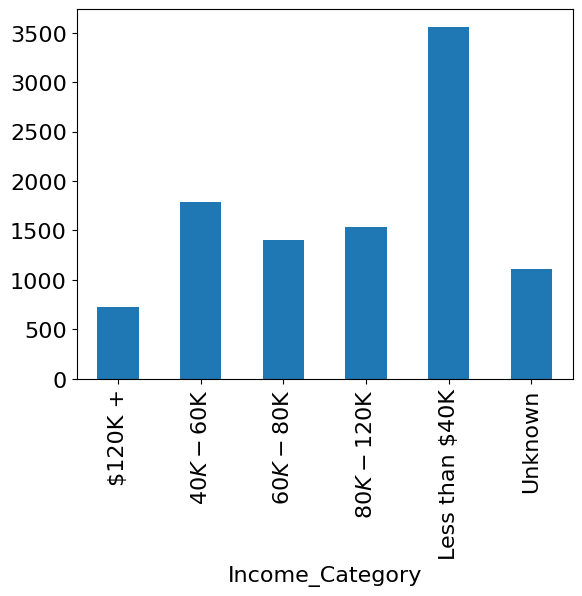

In [6]:
by_category.plot(kind='bar')

'The $\\bf{count}$ value of $\\bf{CLIENTNUM}$ among $\\bf{Income Category=Less than $40K}$\nis unexpectedly $\\bf{high}$ .\nThis might be caused by rows with:\n$\\bf{Gender=F}$\nwhich removal $\\bf{decreases}$ this value.'

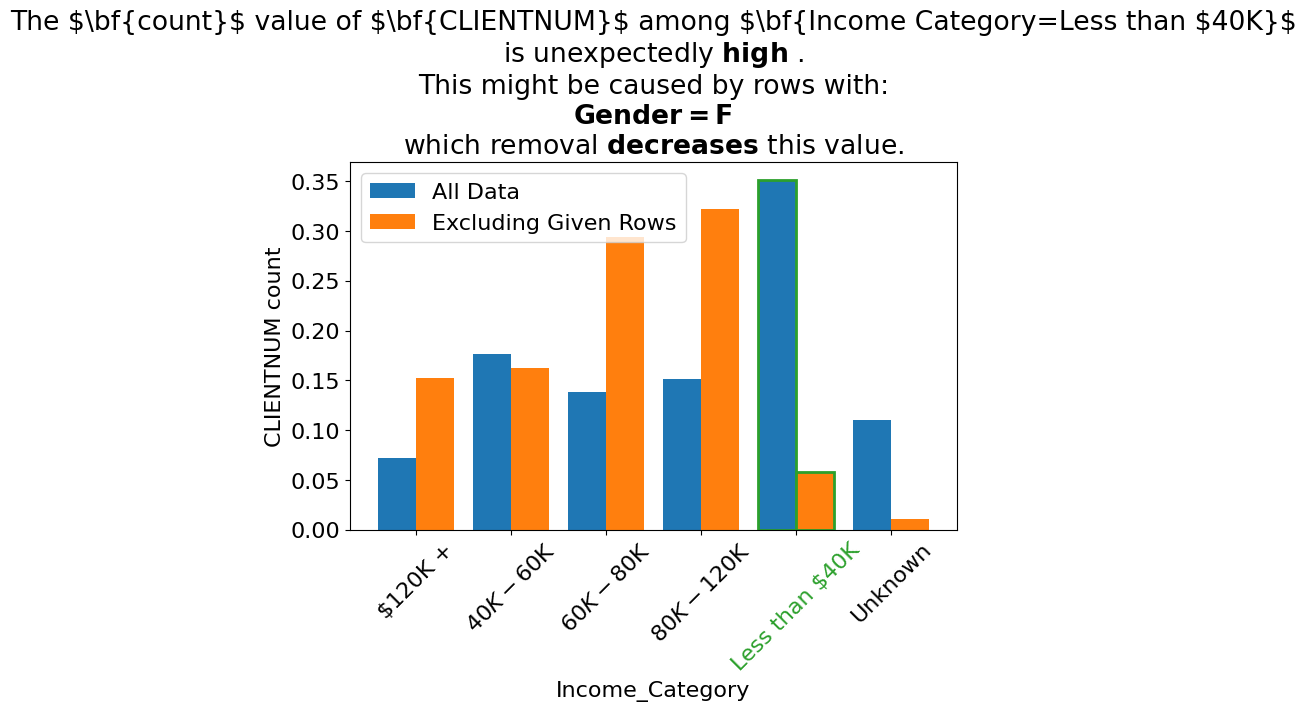

In [8]:
# ['Less than $40K']
by_category.explain(target='Less than $40K', explainer='outlier', dir='high')

In [8]:
females = bank_all[bank_all['Gender'] == 'F']
females['Income_Category'].value_counts()

Income_Category
Less than $40K    3284
Unknown           1060
$40K - $60K       1014
Name: count, dtype: int64

In [9]:
females_by_category = females.groupby(['Income_Category'])['CLIENTNUM'].count()

<Axes: xlabel='Income_Category'>

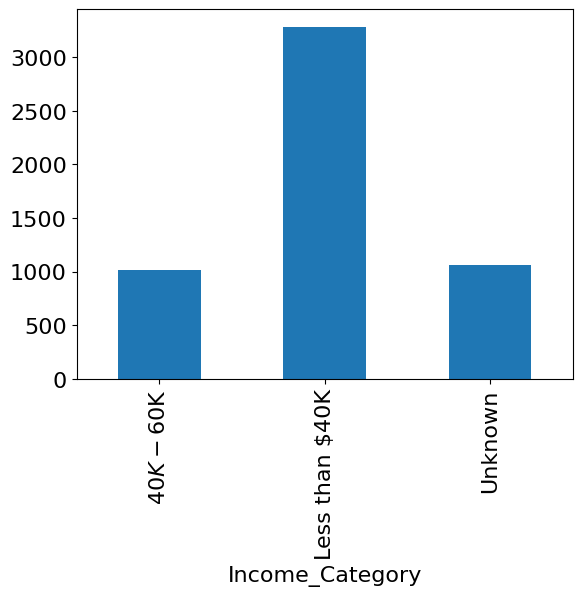

In [10]:
females_by_category.plot(kind='bar')

inf: 19.521390157795132
inf: 0.9494187005837436


'The highlighted outlier might have been\ncaused by rows that follow this predicate:\n\n$\\bf{1405.22 < Credit Limit < 3092.18}$-$\\bf{low}$, \n\nBefore- 0.61292, After- 0.49602'

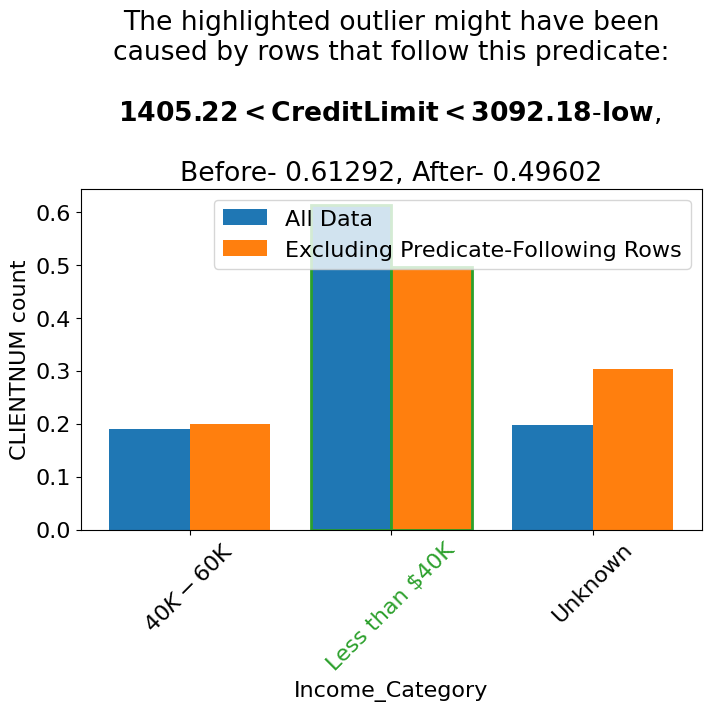

In [29]:
females_by_category.explain(target='Less than $40K', explainer='outlier', dir=1)

## example 2

In [10]:
bank_all['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [19]:
younger = bank_all[bank_all['Customer_Age'] <= 60]

In [20]:
limit_by_age = younger.groupby(['Customer_Age']).Credit_Limit.mean()

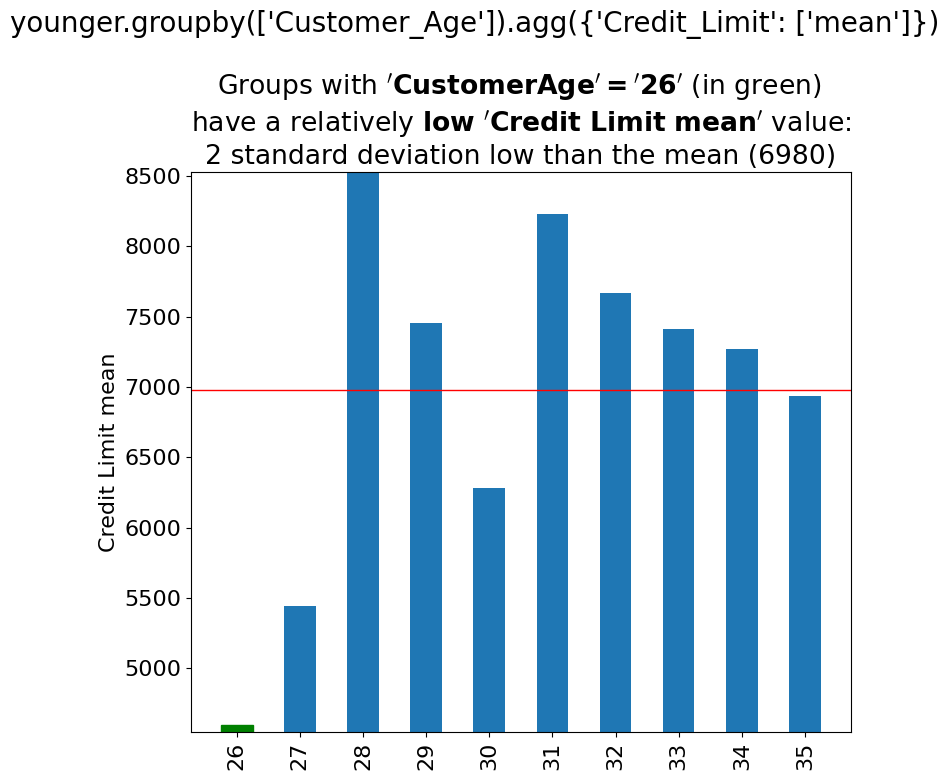

In [21]:
limit_by_age.explain()

In [14]:
bank_all['Months_Inactive_Count_Last_Year'].value_counts()

Months_Inactive_Count_Last_Year
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: count, dtype: int64

In [25]:
limit_by_age.explain(explainer='outlier', target=26, dir=-1)

inf: -0.0


'There was no explanation.'